# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. But what determine if t a movie is considered a good movie or a bad one is it the rating!, maybe it's the diractor. There are many factories influencig the quality of a movie. Let's figure them out. 

### Question(s) for Analysis
> 
1. Who are the top 10 directors with the most moives?
2. Which genres are most popular from?
3. What is the most movies with the highest profit and the lowest?
4. What moive has the highest profit?
5. In what month was the highest revenue? 



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [34]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


From our first impression we can see that we have unnecessary columns we can drop them through the cleaning process. 

In [35]:
df.shape

(10866, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [37]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [38]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [39]:
sum(df.duplicated())

1

This is only one duplicated row so we will droped in the cleaning process

In [40]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Notes**

> From looking at the "df.describe" & "df.info()" we can see there is number of missing values and zero values we will deal with them later through the cleaning process


### Data Cleaning
> 
 

#### Deleting unwanted or unused columns

In [41]:
unwanted_col = ['id','imdb_id','homepage','keywords','overview','runtime','production_companies','budget_adj','revenue_adj']
df.drop(unwanted_col, inplace=True , axis=1)

In [42]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


####Droping the duplicated

In [43]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

####Checking the number of Null values and then droping them from our datasets

In [44]:
df.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [45]:
na_titles = ['cast','director','genres']

df.dropna(subset= na_titles, inplace = True)
#Checking 
df.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
cast                 0
director             0
tagline           2730
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

#### Creating new column called profit

In [46]:
# profit = revenue - budget

df['profit'] = df['revenue'] - df['budget']

df.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1363528810


In [47]:
replace_zeros = ['budget', 'revenue', 'profit']
df[replace_zeros] = df[replace_zeros].replace(0, np.NAN)
df.isnull().sum()

popularity           0
budget            5578
revenue           5888
original_title       0
cast                 0
director             0
tagline           2730
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
profit            4587
dtype: int64

In [48]:
# we want to maintain +10k so we can have a good result
df.shape

(10731, 13)

#### Changing the type for the release_date into a datetime type

In [49]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10731 non-null  float64       
 1   budget          5153 non-null   float64       
 2   revenue         4843 non-null   float64       
 3   original_title  10731 non-null  object        
 4   cast            10731 non-null  object        
 5   director        10731 non-null  object        
 6   tagline         8001 non-null   object        
 7   genres          10731 non-null  object        
 8   release_date    10731 non-null  datetime64[ns]
 9   vote_count      10731 non-null  int64         
 10  vote_average    10731 non-null  float64       
 11  release_year    10731 non-null  int64         
 12  profit          6144 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis





In [50]:
# Creating a function, it takes a column and split the data that contains ('|').

def data_seperator(x):
    # https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html
    # Series.str.cat(others=None, sep=None, na_rep=None, join='left')   
    data = df[x].str.cat(sep = '|') # getting the column's data seprated by | and leave it if there was any
    data = pd.Series(data.split('|')) # splite the data and put them in one column for visualization purposes
    return data
# Testing for director 
data_seperator('director').value_counts()

Woody Allen                46
Clint Eastwood             34
Martin Scorsese            30
Steven Spielberg           30
Steven Soderbergh          23
                           ..
Jean-StÃ©phane Sauvaire     1
Gianni Di Gregorio          1
Jennifer Flackett           1
FranÃ§ois Desagnat          1
Harold P. Warren            1
Length: 5298, dtype: int64

### Research Question 1 (Who are the top 10 directors with the most moives?

Text(0.5, 1.0, 'Top 10 directors')

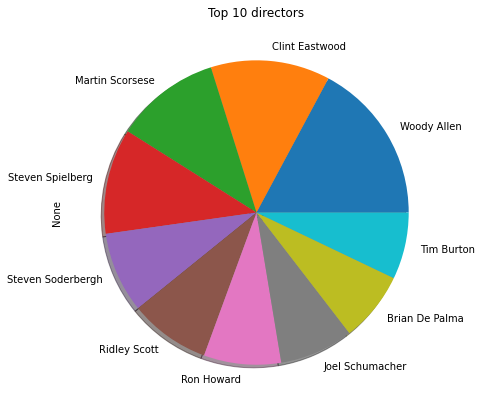

In [51]:
dir = data_seperator('director').value_counts()
dir[:10].plot( kind='pie', figsize=(7,7), shadow=True)
plt.title('Top 10 directors')

**Woody Allen** is considered the most popular director

In [52]:
data_seperator('director').value_counts()

Woody Allen                46
Clint Eastwood             34
Martin Scorsese            30
Steven Spielberg           30
Steven Soderbergh          23
                           ..
Jean-StÃ©phane Sauvaire     1
Gianni Di Gregorio          1
Jennifer Flackett           1
FranÃ§ois Desagnat          1
Harold P. Warren            1
Length: 5298, dtype: int64

In [53]:
name = data_seperator('director').value_counts().index[0]
number = data_seperator('director').value_counts()[0]
print('Top Director of all time is {} with a {} movie'.format(name , number))

Top Director of all time is Woody Allen with a 46 movie


### Research Question 2  (Which genres are most popular from?)

Text(0.5, 1.0, 'Top 10 genres')

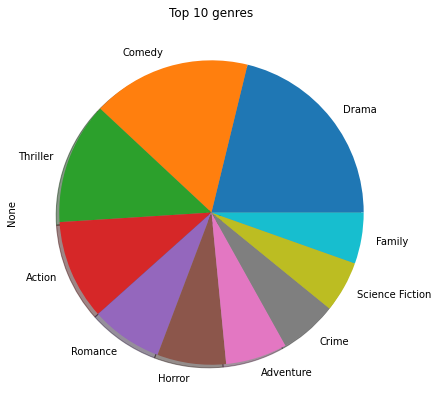

In [54]:
gen = data_seperator('genres').value_counts()
gen[:10].plot( kind='pie', figsize=(7,7), shadow=True)
plt.title('Top 10 genres')

**Drama** is considered the most popular

In [55]:
data_seperator('genres').value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

In [56]:
number = data_seperator('genres').value_counts()[0]
name = data_seperator('genres').value_counts().index[0]
print('Top genre of all is time is {} with the number of {} movie'.format(name,number))

Top genre of all is time is Drama with the number of 4746 movie


### Research Question 3  (who is the top 10 casts with the most movies?)

Text(0.5, 1.0, 'Top 10 Casts')

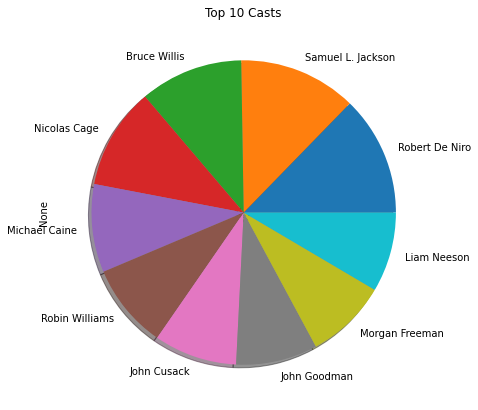

In [57]:
cast = data_seperator('cast').value_counts()
cast[:10].plot( kind='pie', figsize=(7,7), shadow=True)
plt.title('Top 10 Casts')

**Robert De Niro** is considered the most popular cast ❤

In [58]:
data_seperator('cast').value_counts()

Robert De Niro         72
Samuel L. Jackson      71
Bruce Willis           62
Nicolas Cage           61
Michael Caine          53
                       ..
Jessica Grace Smith     1
Chris Shiflett          1
Pat Smear               1
Taylor Hawkins          1
Stephanie Nielson       1
Length: 18930, dtype: int64

In [59]:
number = data_seperator('cast').value_counts()[0]
name = data_seperator('cast').value_counts().index[0]
print('Top Actor of all time is {} with the number of {} movie'.format(name,number))

Top Actor of all time is Robert De Niro with the number of 72 movie


Text(0, 0.5, 'profit')

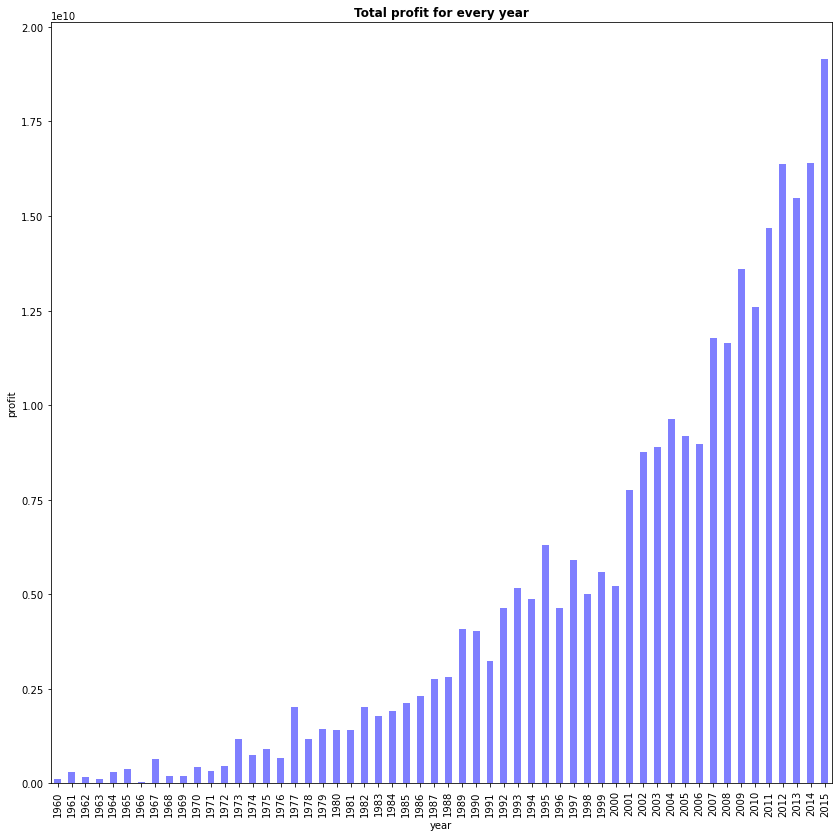

In [60]:
x = df.groupby('release_year')['profit'].sum()
x.plot(kind='bar', figsize=(14,14), color='blue', alpha=0.5)
plt.title('Total profit for every year', fontweight='bold')
plt.xlabel('year')
plt.ylabel('profit')

In the above plot we can see that through the years the total profit is increasing in a very significant matter.

In [61]:
df['profit'].describe()

count    6.144000e+03
mean     4.456621e+07
std      1.250469e+08
min     -4.139124e+08
25%     -4.500000e+06
50%      4.066558e+06
75%      4.461295e+07
max      2.544506e+09
Name: profit, dtype: float64

### Research Question 4: What movie has the highest profit?

In [62]:
top_moive = df['original_title'][df['profit'].idxmax()]
print('The highset profit moive of all time is {}'.format(top_moive))

The highset profit moive of all time is Avatar


### Research Question 5 In what month was the highest revenue?

Text(0, 0.5, 'revenue')

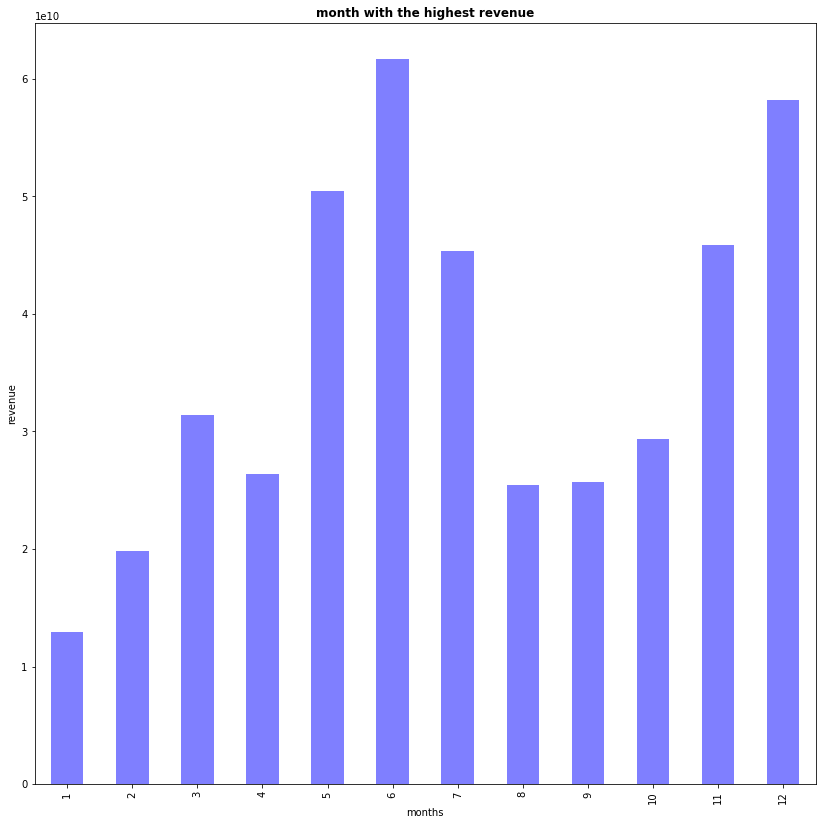

In [63]:
df['month'] = df['release_date'].dt.month
x = df.groupby('month')['revenue'].sum()
x.plot(kind='bar', figsize=(14,14), color='blue', alpha=0.5)
plt.title('month with the highest revenue', fontweight='bold')
plt.xlabel('months')
plt.ylabel('revenue')

As we can see through the above plot, On June and December the revenue is the highest and then comes May on third so releasing movies on these months would be a great a idea

<a id='conclusions'></a>
## Conclusions

After looking through this dataset we can conclude that:

*   Top Director of all time is Woody Allen with a 46 movie
*   Top genre of all is time is Drama with the number of 4746 movie
*   Top Actor of all time is Robert De Niro with the number of 72 movie
*   The highset profit moive of all time is Avatar
*   We can see in question 5 that the best time to release a movie is during(June & december) as they have the highest revenue and then May comes third







### Limitation


>
*   Zero values was considered to be alot in both revenues and budget, and droping them would've been damage the result so I had to change them to null better than dropping them.

*  After setting the zero values to null, there were a few null values in the director and cast columns, and a lot in the budget and revenue columns. As a result, a significant amount of data was lost in the process.


In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255